# Conhecendo a base de dados


## Importando os dados

In [2]:
# Importação da base de dados na variavel dados
import pandas as pd
url ='https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
print(f'\n dados importados com sucesso.')



 dados importados com sucesso.


In [3]:
dados.head() #exibe os primeiros 5 itens do dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
dados.tail() #exibe os ultimos 5 itens do dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [5]:
dados.shape

(32960, 9)

In [6]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [8]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [9]:
dados[['Quartos','Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Analise Exploratoria de Dados - EDA

#### 1 - Qual o valor médio de aluguel por tipo de imovel Residencial?


In [10]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


O acumulo de imoveis não residenciais criam um excesso de dados não utilizados dentro do data set que por si so cria um desvio de valor muito grande, sendo o *"Prédio  Inteiro"* a categoria com maior valor de aluguel, gerando um **outlier** muito evidente, Como pode ser observado no grafico gerado através do plot:

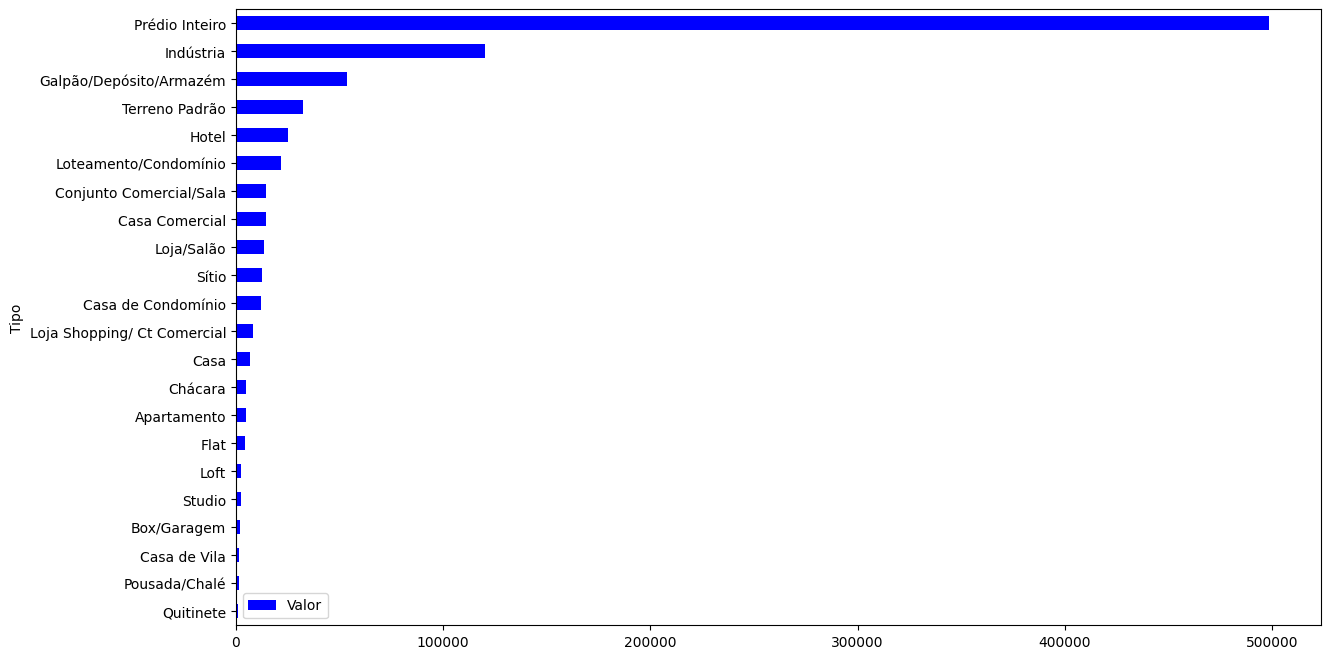

In [11]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_preco_tipo.plot(kind='barh', figsize= (14,8), color = 'blue');



Para contornar isso podemos selecionar as categorias em tipo que não se enquadram em nossos objetivos de analise, todos os imoveis com proposito comercial (lojas, galpões, hoteis e etc.) serão amarzenadas em uma variavel para servir de filtro, atravez de uma **query**:

In [12]:
dados.Tipo.unique()

imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

df_imoveis_residenciais = dados.query('@imoveis_comerciais not in Tipo' )


Com os dados filtrados, podemos revisar o passo anterior e plotar novamente nosso grafico, agora com as categorias mais alinhadas ao objetivo de analise do nosso cliente: 

In [13]:
def resultado_medias():
    df_imoveis_residenciais.Tipo.unique()

    df_preco_tipo = df_imoveis_residenciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
    df_preco_tipo.plot(kind='barh', figsize= (6,6), color = 'blue')
    
    return df_preco_tipo.groupby('Tipo')[['Valor']].mean().sort_values('Valor')


#### Resultado

,Valor
Tipo,
Quitinete,1246.840909
Casa de Vila,1574.369478
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Casa,6793.454922
Casa de Condomínio,11952.061245


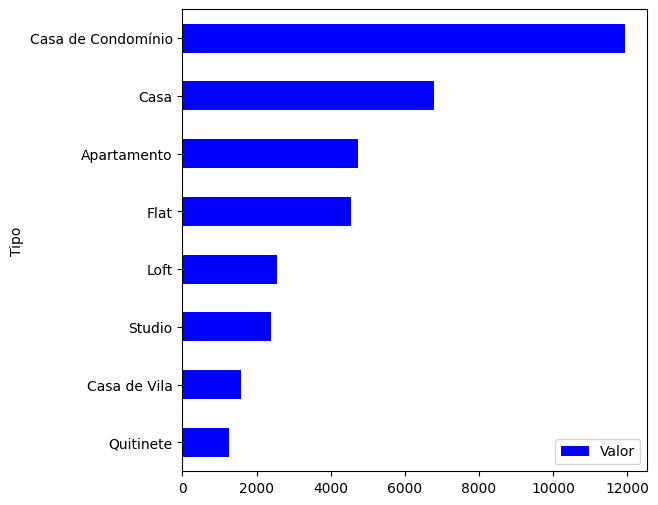

In [14]:
resultado_medias()

#### 2 - Qual o percentual de cada tipo de imóvel presente na base de dados



Para responder essa pergunta tempos que ter a relação de quantos tipos unicos de imoveis residenciais temos no nosso dataset. o metodo *counts( )* nos ajuda a contabilizar quantas vezes cada item se repete:

In [15]:
print(df_imoveis_residenciais.Tipo.value_counts())
print(f'\nContabilizando o total de {df_imoveis_residenciais.shape[0]} itens')


Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

Contabilizando o total de 23111 itens


Utilizando o atributo *normalize = True* o proprio *value_counts( )* já nos entrega o valor em porcentil de cada item:

*.to_frame* permite converter o objeto diretamente pra um dataframe do Pandas.

In [16]:
df_porcentual = df_imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame()
df_porcentual.rename(columns={'proportion':'Porcentuais'}, inplace=True)
df_porcentual



,Porcentuais
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


Armazenaremos os dados na variavel df_porcentual_tipo, assim podemos transformar esses dados em um grafico para tornar a ideia mais visual possivel:

<Axes: xlabel='Tipos', ylabel='Porcentual'>

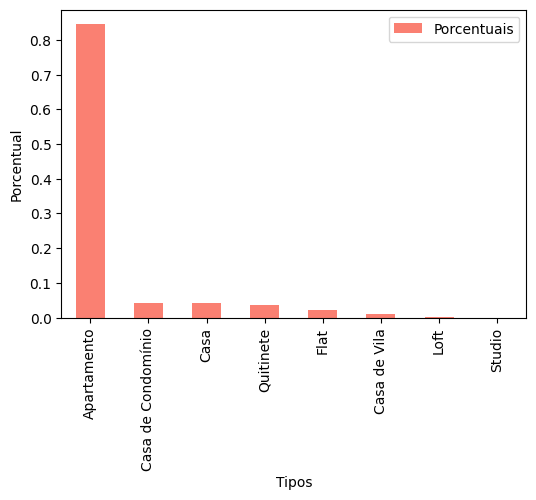

In [17]:
#df_porcentual = df_imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')
df_porcentual.plot(kind='bar',figsize=(6,4), color='salmon', xlabel='Tipos', ylabel='Porcentual')

#### Resultado

<Axes: xlabel='Tipos', ylabel='Porcentual'>

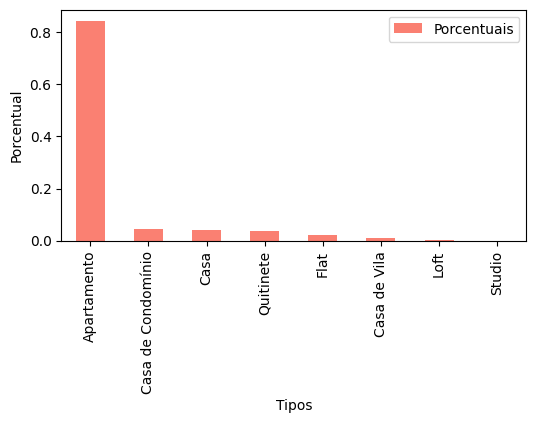

In [18]:
df_porcentual.plot(kind='bar',figsize=(6,3), color='salmon', xlabel='Tipos', ylabel='Porcentual')


##### Consideração final

É possivel observar que o numero total de Apartamentos de longe superar os valores dos outros tipos de imoveis residenciais somados. Sabendo que devido as qualidades e especificidades deste tipo de imovel é esperado que não apenas ele seja muito numeroso, mas que suas variaveis sejam igualmente destoantes quando comparados a outros imoveis: *O custo de uma Casa em aluguel pode ser maior, mas sem gastos como condominio e IPTU* com o risco de influenciar analises futuras. 

de tal forma, o parecer da equipe de analise é que os demais valores sejam postos de lado e passemos a focar nos dados mais significantes do dataset,**os apartamentos**. Os valores filtrados com apenas dados de apartamentos daqui para frente estarão armazenados na variavel **df_apt**

In [19]:
df_apt = df_imoveis_residenciais.query('Tipo == "Apartamento"')
df_apt

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


#### Demanda Exepcional do time de ML


#####  Calcular a média de quartos por apartamento;

In [20]:
media_quartos = df_apt.groupby('Tipo')[['Quartos']].mean().sort_values('Quartos')
total_apt = df_apt[df_apt['Tipo'] == 'Apartamento'].shape[0]
valor_media_qartos =media_quartos.loc['Apartamento', 'Quartos']
media_quartos.head()

df_apt['Quartos'].mean()


np.float64(2.481568707761622)


A média de quartos(2.481568707761622) pode ser chamada pela variavel **"valor_media_quartos"**

#####  Conferir quantos bairros únicos existem na nossa base de dados

In [21]:
print(f'Existem {df_apt.Bairro.nunique()} bairros cadastrados no dataset')
df_apt[df_apt['Tipo'] == 'Apartamento'].groupby(['Tipo', 'Bairro']).size().reset_index(name='Contagem')


Existem 149 bairros cadastrados no dataset


,Tipo,Bairro,Contagem
0,Apartamento,Abolição,10
1,Apartamento,Alto da Boa Vista,3
2,Apartamento,Anchieta,4
3,Apartamento,Andaraí,92
4,Apartamento,Anil,56
...,...,...,...
144,Apartamento,Vila Valqueire,36
145,Apartamento,Vila da Penha,92
146,Apartamento,Vista Alegre,18
147,Apartamento,Zumbi,2


#####  Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [22]:
df_apt.groupby('Bairro')[['Valor']].mean().sort_values('Valor',ascending=False)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
...,...
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000


##### Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas

<Axes: xlabel='Valor de Aluguel', ylabel='Bairro'>

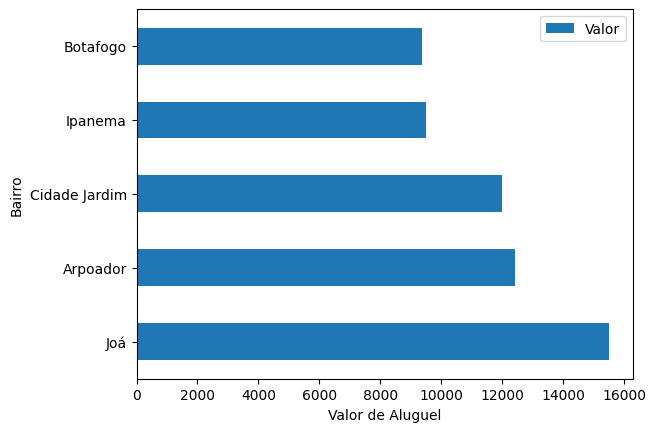

In [23]:
apt_valor_top = df_apt.groupby('Bairro')[['Valor']].mean().sort_values('Valor',ascending=False).head(5)
apt_valor_top.plot(kind='barh', xlabel='Valor de Aluguel')

#### 3

#### 4

#### 5

# Tratando e Filtrando os Dados


### Lidando com dados nulos


In [24]:
df_apt_nulos = df_apt.isnull().sum()
df_apt_nulos

# dropna() remove todas as linhas ou colunas com um valor nulo.
# fillna() preenche os dados nulos com method="ffill" ou method="bfill"
# interpolate() preenche os dados nulos com valores a partir dos vizinhos.




Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [25]:
df_apt= df_apt.fillna(0)


In [26]:
df_apt.query('Valor == 0 | Condominio == 0')


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [27]:
registros_a_remover = df_apt.query('Valor == 0 | Condominio == 0').index
registros_a_remover

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [28]:
df_apt.drop(registros_a_remover, axis=0,inplace=True)
df_apt.drop('Tipo', axis=1, inplace=True )
df_apt.query('Valor == 0 | Condominio == 0')


,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [29]:
selecao1=df_apt['Quartos'] == 1
selecao2=df_apt['Valor'] < 1200
selecao_final = ( selecao1) & (selecao2)

df_apt_selecao1 = df_apt[selecao_final]

In [30]:
selecao_2quartos = (df_apt['Quartos']>=2)& (df_apt['Valor']<3000) &(df_apt['Area']>70)
df_apt_selecao2= df_apt[selecao_2quartos]

In [31]:
df_apt.to_csv('Dados_apartamentos.csv', sep= ';', index=False)
df_apt_selecao1.to_csv('Dados_apartamentos_filtro1.csv', sep= ';', index=False)
df_apt_selecao2.to_csv('Dados_apartamentos_filtro2.csv', sep= ';', index=False)
pd.read_csv('Dados_apartamentos.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Demandas do time dev

#### Criando colunas numéricas

In [32]:
df_apt['Valor Mensal'] = df_apt['Valor']+df_apt['Condominio']
df_apt['Valor Anual'] = (df_apt['Valor Mensal']*12)+df_apt['IPTU']
df_apt.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Mensal,Valor Anual
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,25778.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,23474.0


#### Criando colunas categóricas

In [48]:

df_apt['Descrição'] = 'Apartamento com '+ df_apt['Area'].astype(str) +'m² '+\
      df_apt['Quartos'].astype(str)+' quartos ' + ' em ' + df_apt['Bairro']


df_apt.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Mensal,Valor Anual,Descrição
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento com 15m² 1 quartos em Centro
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento com 48m² 1 quartos em Higienópolis
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento com 50m² 2 quartos em Cachambi
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,25778.0,Apartamento com 70m² 2 quartos em Grajaú
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,23474.0,Apartamento com 90m² 3 quartos em Lins de Vas...


#### Criando uma coluna binária para suites

In [50]:
df_apt['Possui suite'] = df_apt['Suites'].apply(lambda x: "Sim" if x >0 else "Não")
df_apt.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Mensal,Valor Anual,Descrição,Possui suite
3,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento com 15m² 1 quartos em Centro,Não
4,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento com 48m² 1 quartos em Higienópolis,Não
6,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento com 50m² 2 quartos em Cachambi,Não
11,Grajaú,2,1,0,70,1500.0,642.0,74.0,2142.0,25778.0,Apartamento com 70m² 2 quartos em Grajaú,Não
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1955.0,23474.0,Apartamento com 90m² 3 quartos em Lins de Vas...,Sim


####